In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

#Load Dataset
df = pd.read_csv('./medical_clean-Task1.csv', index_col=0)

#View Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [2]:
#Inspect Dataframe's information
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [3]:
#Convert column to string from int, then front-fill string with 0's to reach 5 chars
df['Zip'] = df['Zip'].astype("str").str.zfill(5)
#Convert column to category from string
df["Area"] = df["Area"].astype("category")
#Convert column to category from string
df["TimeZone"] = df["TimeZone"].astype("category")
#Reformat column representing currency in USD to 3 decimal places from 6
df["Income"] = df["Income"].astype(int)
#Convert column to category from string
df["Marital"] = df["Marital"].astype("category")
#Convert column to category from string
df["Gender"] = df["Gender"].astype("category")
#Recast object > boolean wants to turn everything True, need to map Yes/No to True/False
bool_mapping = {"Yes" : 1, "No" : 0}
#Convert column to boolean from string
df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)
#Convert column to boolean from string
df["Soft_drink"] = df["Soft_drink"].map(bool_mapping)
#Convert column to category from string
df["Initial_admin"] = df["Initial_admin"].astype("category")
#Convert column to boolean from string
df["HighBlood"] = df["HighBlood"].map(bool_mapping)
#Convert column to boolean from string
df["Stroke"] = df["Stroke"].map(bool_mapping)
#Convert column to category from string
df["Complication_risk"] = df["Complication_risk"].astype("category")
#Convert column to boolean from string
df["Overweight"] = df["Overweight"].map(bool_mapping)
#Convert column to boolean from string
df["Arthritis"] = df["Arthritis"].map(bool_mapping)
#Convert column to boolean from string
df["Diabetes"] = df["Diabetes"].map(bool_mapping)
#Convert column to boolean from string
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)
#Convert column to boolean from string
df["BackPain"] = df["BackPain"].map(bool_mapping)
#Convert column to boolean from string
df["Anxiety"] = df["Anxiety"].map(bool_mapping)
#Convert column to boolean from string
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(bool_mapping)
#Convert column to boolean from string
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)
#Convert column to boolean from string
df["Asthma"] = df["Asthma"].map(bool_mapping)
#Convert column to category from string
df["Services"] = df["Services"].astype("category")
#Reformat column representing currency in USD to 3 decimal places from 6
df["TotalCharge"] = df.TotalCharge.round(3)
#Reformat column representing currency in USD to 3 decimal places from 6
df["Additional_charges"] = df.Additional_charges.round(3)

#Establish map for reversing survey questions to reflect a truth where 1 < 8 (currently the reverse)
survey_mapping = {1: 8, 2: 7, 3 : 6, 4: 5, 5: 4, 6: 3, 7 : 2, 8 : 1}
#Establish ordered categorical datatype structure ("1" < "2" < ... < "7" < "8") for survey response columns
survey_scores = CategoricalDtype(categories=["1", "2", "3", "4", "5", "6", "7", "8"], ordered=True)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item1"] = df["Item1"].map(survey_mapping)
#Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item1"] = df["Item1"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item1"] = df["Item1"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item2"] = df["Item2"].map(survey_mapping)
#Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item2"] = df["Item2"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item2"] = df["Item2"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item3"] = df["Item3"].map(survey_mapping)
#Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item3"] = df["Item3"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item3"] = df["Item3"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item4"] = df["Item4"].map(survey_mapping)
#Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item4"] = df["Item4"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item4"] = df["Item4"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item5"] = df["Item5"].map(survey_mapping)
#Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item5"] = df["Item5"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item5"] = df["Item5"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item6"] = df["Item6"].map(survey_mapping)
#Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item6"] = df["Item6"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item6"] = df["Item6"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item7"] = df["Item7"].map(survey_mapping)
#Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item7"] = df["Item7"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item7"] = df["Item7"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item8"] = df["Item8"].map(survey_mapping)
#Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item8"] = df["Item8"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item8"] = df["Item8"].astype(survey_scores)
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.703,17939.403,6,6,7,7,5,6,6,5
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190,17612.998,6,5,6,5,5,5,6,6
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234,17505.192,7,5,5,5,6,5,6,6
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830,12993.437,6,4,4,6,5,4,4,4
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073,3716.526,7,8,6,6,4,6,5,6


#Looking at Variable Stats and Counts

In [4]:
df.Area.value_counts()

Area
Rural       3369
Suburban    3328
Urban       3303
Name: count, dtype: int64

In [5]:
df.Children.value_counts().sort_index()

Children
0     2548
1     2509
2     1475
3     1489
4      995
5      169
6      191
7      213
8      209
9      108
10      94
Name: count, dtype: int64

In [6]:
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [7]:
df.Gender.value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

In [8]:
df.ReAdmis.value_counts()

ReAdmis
0    6331
1    3669
Name: count, dtype: int64

In [9]:
df.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [10]:
df.Doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [11]:
df.Full_meals_eaten.describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

In [12]:
df.vitD_supp.describe()

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: vitD_supp, dtype: float64

In [13]:
df.Soft_drink.value_counts()

Soft_drink
0    7425
1    2575
Name: count, dtype: int64

In [14]:
df.Initial_admin.value_counts().sort_index()

Initial_admin
Elective Admission       2504
Emergency Admission      5060
Observation Admission    2436
Name: count, dtype: int64

In [15]:
df.HighBlood.value_counts()

HighBlood
0    5910
1    4090
Name: count, dtype: int64

In [16]:
df.Stroke.value_counts()

Stroke
0    8007
1    1993
Name: count, dtype: int64

In [17]:
df.Complication_risk.value_counts().sort_index()

Complication_risk
High      3358
Low       2125
Medium    4517
Name: count, dtype: int64

In [18]:
df.Overweight.value_counts()

Overweight
1    7094
0    2906
Name: count, dtype: int64

In [19]:
df.Arthritis.value_counts()

Arthritis
0    6426
1    3574
Name: count, dtype: int64

In [20]:
df.Diabetes.value_counts()

Diabetes
0    7262
1    2738
Name: count, dtype: int64

In [21]:
df.Hyperlipidemia.value_counts()

Hyperlipidemia
0    6628
1    3372
Name: count, dtype: int64

In [22]:
df.Anxiety.value_counts()

Anxiety
0    6785
1    3215
Name: count, dtype: int64

In [23]:
df.Allergic_rhinitis.value_counts()

Allergic_rhinitis
0    6059
1    3941
Name: count, dtype: int64

In [24]:
df.Reflux_esophagitis.value_counts()

Reflux_esophagitis
0    5865
1    4135
Name: count, dtype: int64

In [25]:
df.Asthma.value_counts()

Asthma
0    7107
1    2893
Name: count, dtype: int64

In [26]:
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer_id         10000 non-null  object  
 1   Interaction         10000 non-null  object  
 2   UID                 10000 non-null  object  
 3   City                10000 non-null  object  
 4   State               10000 non-null  object  
 5   County              10000 non-null  object  
 6   Zip                 10000 non-null  object  
 7   Lat                 10000 non-null  float64 
 8   Lng                 10000 non-null  float64 
 9   Population          10000 non-null  int64   
 10  Area                10000 non-null  category
 11  TimeZone            10000 non-null  category
 12  Job                 10000 non-null  object  
 13  Children            10000 non-null  int64   
 14  Age                 10000 non-null  int64   
 15  Income              10000 non-null  int64

In [28]:
#Load Encoder to create Dummy Variables for KNN Classification
OneHotEncode = OneHotEncoder()
print(OneHotEncode)

#OneHotencode Categorical Columns Area, Gender, Initial Admin, and Complication Risk
encoded_dummies = OneHotEncode.fit_transform(df[["Area", "Gender", "Initial_admin", "Complication_risk"]]).toarray()

#Print the categories
categories = OneHotEncode.categories_
print(categories)

OneHotEncoder()
[array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Female', 'Male', 'Nonbinary'], dtype=object), array(['Elective Admission', 'Emergency Admission',
       'Observation Admission'], dtype=object), array(['High', 'Low', 'Medium'], dtype=object)]


In [29]:
#Convert the encoded array to a DataFrame
encoded_df = pd.DataFrame(encoded_dummies, columns=OneHotEncode.get_feature_names_out(["Area", "Gender", "Initial_admin", "Complication_risk"]))

#Concatenate the original DataFrame and the new DataFrame
df_combined = pd.concat([df, encoded_df], axis=1)

print(df_combined.head())

  Customer_id                           Interaction  \
1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
1  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
2  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
3  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
4  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
5  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  Population  ... Area_Urban Gender_Female Gender_Male  \
1  34.34960 -86.72508      2951.0  ...        1.0           1.0         0.0   
2  30.84513 -85.22907     1130

In [30]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10001 entries, 1 to 0
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Customer_id                          10000 non-null  object  
 1   Interaction                          10000 non-null  object  
 2   UID                                  10000 non-null  object  
 3   City                                 10000 non-null  object  
 4   State                                10000 non-null  object  
 5   County                               10000 non-null  object  
 6   Zip                                  10000 non-null  object  
 7   Lat                                  10000 non-null  float64 
 8   Lng                                  10000 non-null  float64 
 9   Population                           10000 non-null  float64 
 10  Area                                 10000 non-null  category
 11  TimeZone                

In [31]:
#Drop undesired columns
df_combined.drop(["Customer_id", "Interaction", "UID", "City", "State", "County", "Zip", "Lat", "Lng", 
         "Population", "Area", "TimeZone", "Job", "Income", "Marital", "Gender", "Initial_admin",
         "Complication_risk", "Services", "TotalCharge", "Additional_charges", "Item1", "Item2", 
         "Item3", "Item4", "Item5", "Item6", "Item7", "Item8"], axis=1, inplace=True)

#Check dataframe
df_combined.head()

,Children,Age,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,HighBlood,Stroke,...,Area_Urban,Gender_Female,Gender_Male,Gender_Nonbinary,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium
1,1.0,53.0,0.0,19.141466,6.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3.0,51.0,0.0,18.940352,4.0,2.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3.0,53.0,0.0,18.057507,4.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,78.0,0.0,16.576858,4.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1.0,22.0,0.0,17.439069,5.0,0.0,2.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [32]:
#Separate the X variables (explanatory) from the Y variable (response) into different dataframes
df_X = df_combined.drop(["ReAdmis"], axis=1).copy()
df_y = df_combined["ReAdmis"].copy()

In [33]:
#Standardize the X variables (explanatory) to put all on the same scale for KNN
df_X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_X), columns=df_X.columns)
df_X

,Children,Age,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,HighBlood,Stroke,Overweight,...,Area_Urban,Gender_Female,Gender_Male,Gender_Nonbinary,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium
0,0.1,0.492958,0.562756,0.625,0.000000,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.3,0.464789,0.550632,0.375,0.285714,0.2,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.3,0.492958,0.497410,0.375,0.142857,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.845070,0.408150,0.375,0.142857,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.1,0.056338,0.460128,0.500,0.000000,0.4,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.4,0.971831,0.504615,0.500,0.000000,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9997,0.3,0.380282,0.441440,0.375,0.285714,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9998,0.3,0.352113,0.609113,0.500,0.285714,0.2,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9999,0.8,0.732394,0.517371,0.500,0.000000,0.2,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Y Variable - ReAdmis
df_y

1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
9997     1.0
9998     1.0
9999     1.0
10000    1.0
0        NaN
Name: ReAdmis, Length: 10001, dtype: float64

In [35]:
#Somehow I have Nan Values and I am not sure where they are coming from so I am going to drop those rows
#Drop rows with missing values in df_X
df_X_dropped = df_X.dropna()
df_y_dropped = df_y[df_X_dropped.index]

In [36]:
#Drop rows with NaN values in df_y
df_y_dropped = df_y.dropna()
df_X_dropped = df_X.loc[df_y_dropped.index]

In [37]:
df_X

,Children,Age,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,HighBlood,Stroke,Overweight,...,Area_Urban,Gender_Female,Gender_Male,Gender_Nonbinary,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium
0,0.1,0.492958,0.562756,0.625,0.000000,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.3,0.464789,0.550632,0.375,0.285714,0.2,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.3,0.492958,0.497410,0.375,0.142857,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.845070,0.408150,0.375,0.142857,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.1,0.056338,0.460128,0.500,0.000000,0.4,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.4,0.971831,0.504615,0.500,0.000000,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9997,0.3,0.380282,0.441440,0.375,0.285714,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9998,0.3,0.352113,0.609113,0.500,0.285714,0.2,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9999,0.8,0.732394,0.517371,0.500,0.000000,0.2,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_y

1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
9997     1.0
9998     1.0
9999     1.0
10000    1.0
0        NaN
Name: ReAdmis, Length: 10001, dtype: float64

In [39]:
#Still have Nan values that the SelectBestK does not like
#Drop rows with NaN values in both df_X and df_y
df_combined_dropped = pd.concat([df_X, df_y], axis=1).dropna()
df_X_dropped = df_combined_dropped.iloc[:, :-1]
df_y_dropped = df_combined_dropped.iloc[:, -1]

#Use SelectKBest to determine the best features to include in the model
feat_select = SelectKBest(f_classif, k='all')
X_new = feat_select.fit_transform(df_X_dropped, df_y_dropped)

#Get p-values of features
feat_pvals = pd.DataFrame({'Feature': df_X.columns, 'p_value': feat_select.pvalues_}).sort_values('p_value')
print(feat_pvals[feat_pvals['p_value'] < 0.05])

                              Feature   p_value
18                       Initial_days  0.000000
26  Initial_admin_Emergency Admission  0.041389


In [40]:
#Ensure df_y_dropped is a Series
df_y_dropped = df_y_dropped.reset_index(drop=True)

#Combine df_X_dropped and df_y_dropped into a new dataframe
df_new = df_X_dropped.copy()
df_new.insert(len(df_new.columns), column="ReAdmis", value=df_y_dropped)

#Save dataframe to CSV
df_new.to_csv('D209_task1_full_clean_revision3_JHOSEY.csv', index=False)

Creating Training and Testing Datasets

In [41]:
#Set X and y to equal the selected X features and the y response we are focused on
X = df_X_dropped[["Initial_days", "Initial_admin_Emergency Admission"]]
y = df_y_dropped

#Split the data into train and test sets, 70% train, 30% test, use stratify to maintain proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, 
                    random_state = 42, stratify = y)

In [42]:
#Save each of the datasets to CSV
X_train.to_csv('D209_task1_Xtrain_revision3_JHOSEY.csv', index=False)
X_test.to_csv('D209_task1_Xtest_revision3_JHOSEY.csv', index=False)
y_train.to_csv('D209_task1_ytrain_revision3_JHOSEY.csv', index=False)
y_test.to_csv('D209_task1_ytest_revision3_JHOSEY.csv', index=False)

In [43]:
# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 50)}

# Instantiate the KNeighborsClassifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit GridSearchCV
knn_cv.fit(X_train, y_train)

# Print best parameters found by GridSearchCV
print("Best parameters:", knn_cv.best_params_)

Best parameters: {'n_neighbors': 39}


In [44]:
#Find score of best parameter from GridSearchCV
knn_cv.best_score_

0.8665304809557848

Model Starts now

The confusion matrix for this KNN model:
Predicted Not Readmitted | Predicted Readmitted Recently
[1501  399] Actual Not Readmitted
[   0 1100] Actual Readmission
The training accuracy of this KNN classification is 0.8662474992855101.
The testing accuracy of this KNN classification model is 0.867.


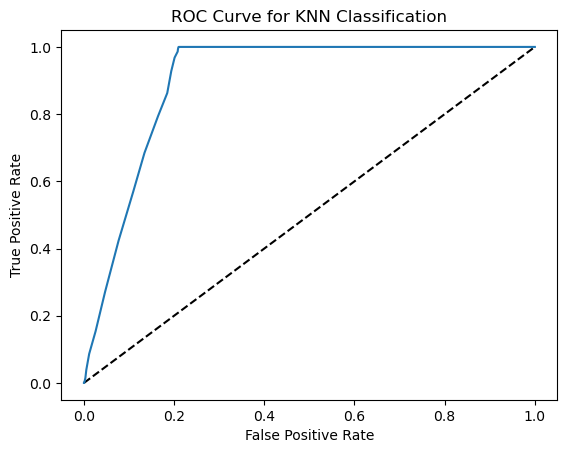

The Area Under the Curve (AUC) score is: 0.9017454545454545

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88      1900
         1.0       0.73      1.00      0.85      1100

    accuracy                           0.87      3000
   macro avg       0.87      0.90      0.86      3000
weighted avg       0.90      0.87      0.87      3000



In [45]:
#Perform KNN using the value of k=39 from the above grid search
knn = KNeighborsClassifier(n_neighbors = 39)

#Fit to the training data
knn.fit(X_train, y_train)
#Generate y_pred array
y_pred = knn.predict(X_test)
final_matrix = confusion_matrix(y_test, y_pred)

#Print confusion matrix and accuracy score
print("The confusion matrix for this KNN model:")
print("Predicted Not Readmitted | Predicted Readmitted Recently")
print(f"{final_matrix[0]} Actual Not Readmitted")
print(f"{final_matrix[1]} Actual Readmission")
print(f"The training accuracy of this KNN classification is {knn.score(X_train, y_train)}.")
print(f"The testing accuracy of this KNN classification model is {knn.score(X_test, y_test)}.")

#Generate AUC score
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classification')
plt.show()
print(f"The Area Under the Curve (AUC) score is: {roc_auc_score(y_test, y_pred_prob)}\n")
print(classification_report(y_test, y_pred))